<a href="https://colab.research.google.com/github/AAbdullatif16/PCD/blob/main/Deteksi_Tepi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengolahan Citra

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Deteksi Tepi

* KELOMPOK 4
* A ABDUL LATIF - 2106145
* FAHRIL        - 2106

---------------------------------------

### Import Dependency

In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
volume = "panjang * lebar *\n tinggi"
print (volume)

panjang * lebar *
 tinggi


In [ ]:
print("volume = panjang * lebar * \n tinggi")

volume = panjang * lebar * 
 tinggi


### Load Image

In [11]:
imgNormal = imageio.imread("/content/gdrive/MyDrive/PCD Kelompok4/samplefoto.jpg")

<ipython-input-11-32cd6e69026c>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgNormal = imageio.imread("/content/gdrive/MyDrive/PCD Kelompok4/samplefoto.jpg")


### Show Image

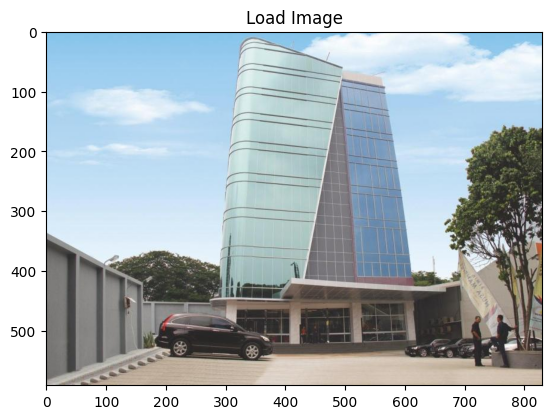

In [12]:
plt.imshow(imgNormal)
plt.title("Load Image")
plt.show()

---------------------

## To Grayscale

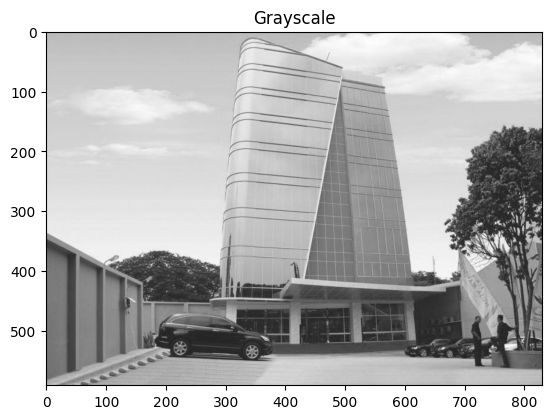

In [13]:
imgGrayscale = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(0, imgNormal.shape[0]):
    for x in range(0, imgNormal.shape[1]):
        r = imgNormal[y][x][0]
        g = imgNormal[y][x][1]
        b = imgNormal[y][x][2]
        gr = ( int(r) + int(g) + int(b) ) / 3
        imgGrayscale[y][x] = (gr, gr, gr)

plt.imshow(imgGrayscale)
plt.title("Grayscale")
plt.show()

---------------------

## Metode Robert

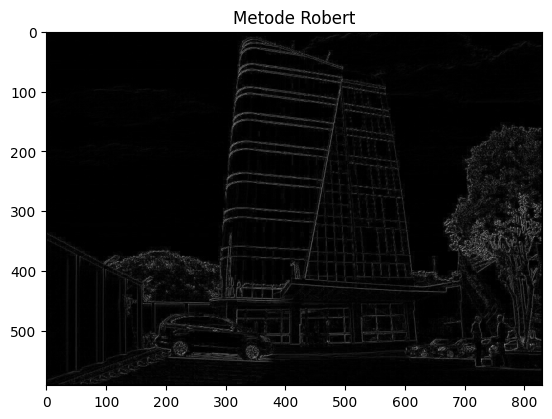

In [14]:
imgDTRobert = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        x1 = int(imgGrayscale[y][x - 1][0])
        x2 = int(imgGrayscale[y][x][0])
        x3 = int(imgGrayscale[y - 1][x][0])
        x4 = int(imgGrayscale[y][x][0])
        xb = int((x2 - x1) + (x4 - x3))
        if xb < 0:
            xb = -xb
        if xb > 255:
            xb = 255
        imgDTRobert[y][x] = (xb, xb, xb)

plt.imshow(imgDTRobert)
plt.title("Metode Robert")
plt.show()

------------------

## Metode Prewitt

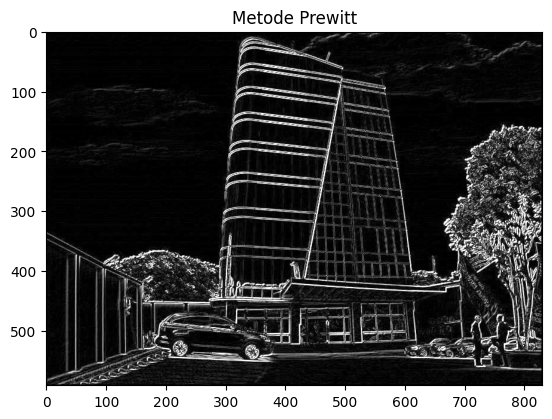

In [15]:
imgDTPrewitt = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        x1 = int(imgGrayscale[y - 1][x - 1][0])
        x2 = int(imgGrayscale[y][x - 1][0])
        x3 = int(imgGrayscale[y + 1][x - 1][0])
        x4 = int(imgGrayscale[y - 1][x][0])
        x5 = int(imgGrayscale[y][x][0])
        x6 = int(imgGrayscale[y + 1][x][0])
        x7 = int(imgGrayscale[y - 1][x + 1][0])
        x8 = int(imgGrayscale[y][x + 1][0])
        x9 = int(imgGrayscale[y + 1][x + 1][0])
        xh = int(-x1 - x4 - x7 + x3 + x6 + x9)
        xv = int(-x1 - x2 - x3 + x7 + x8 + x9)
        xb = int(xh + xv)
        if xb < 0:
            xb = -xb
        if xb > 255:
            xb = 255
        imgDTPrewitt[y][x] = (xb, xb, xb)

plt.imshow(imgDTPrewitt)
plt.title("Metode Prewitt")
plt.show()

------------------

## Metode Sobel

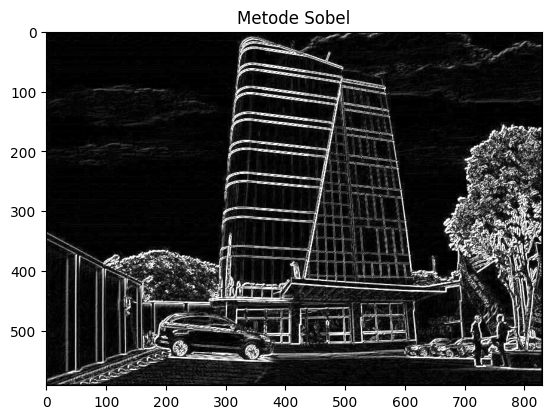

In [16]:
imgDTSobel = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        x1 = int(imgGrayscale[y - 1][x - 1][0])
        x2 = int(imgGrayscale[y][x - 1][0])
        x3 = int(imgGrayscale[y + 1][x - 1][0])
        x4 = int(imgGrayscale[y - 1][x][0])
        x5 = int(imgGrayscale[y][x][0])
        x6 = int(imgGrayscale[y + 1][x][0])
        x7 = int(imgGrayscale[y - 1][x + 1][0])
        x8 = int(imgGrayscale[y][x + 1][0])
        x9 = int(imgGrayscale[y + 1][x + 1][0])
        xh = int(-x1 - (2 * x4) - x7 + x3 + (2 * x6) + x9)
        xv = int(-x1 - (2 * x2) - x3 + x7 + (2 * x8) + x9)
        xb = int(xh + xv)
        if xb < 0:
            xb = -xb
        if xb > 255:
            xb = 255
        imgDTSobel[y][x] = (xb, xb, xb)

plt.imshow(imgDTSobel)
plt.title("Metode Sobel")
plt.show()

------------------

## Metode Laplacian

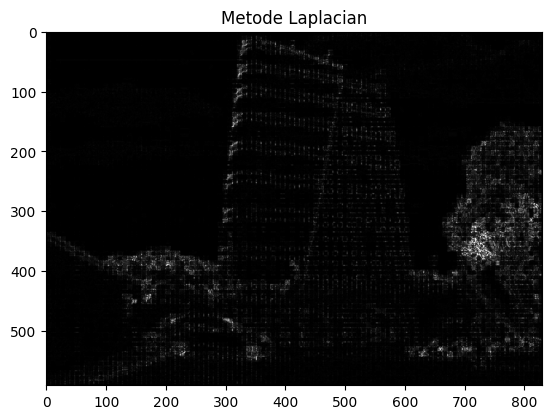

In [17]:
imgDTLaplacian = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        x1 = int(imgGrayscale[y - 1][x - 1][0])
        x2 = int(imgGrayscale[y][x - 1][0])
        x3 = int(imgGrayscale[y + 1][x - 1][0])
        x4 = int(imgGrayscale[y - 1][x][0])
        x5 = int(imgGrayscale[y][x][0])
        x6 = int(imgGrayscale[y + 1][x][0])
        x7 = int(imgGrayscale[y - 1][x + 1][0])
        x8 = int(imgGrayscale[y][x + 1][0])
        x9 = int(imgGrayscale[y + 1][x + 1][0])
        xb = int(x1 - (2 * x2) + x3 - (2 * x4) + (4 * x5) - (2 * x6) + x7 - (2 * x8) + x9)
        if xb < 0:
            xb = -xb
        if xb > 255:
            xb = 255
        imgDTLaplacian[y][x] = (xb, xb, xb)

plt.imshow(imgDTLaplacian)
plt.title("Metode Laplacian")
plt.show()

------------------

## Penambahan Proses Binerisasi dan invers pada setiap metode

## Metode Robert

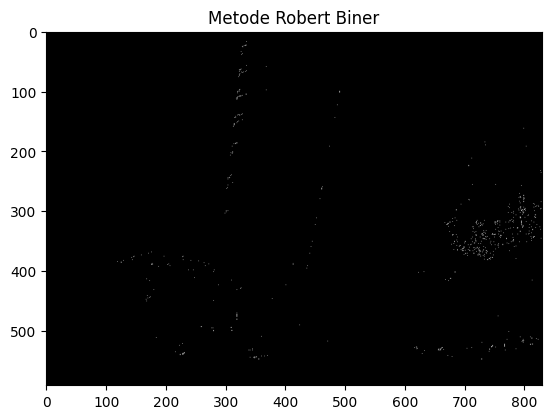

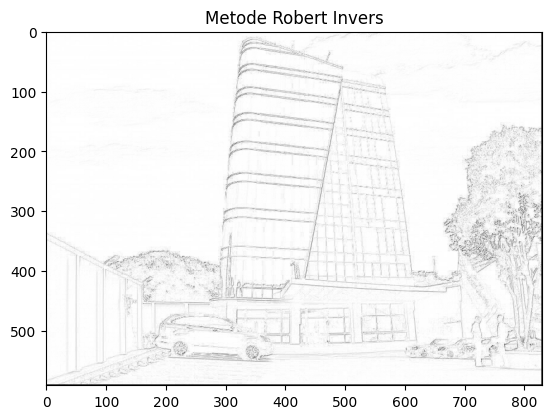

In [18]:
imgDTRobertBiner = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)
imgDTRobertInvers = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        x1 = int(imgGrayscale[y][x - 1][0])
        x2 = int(imgGrayscale[y][x][0])
        x3 = int(imgGrayscale[y - 1][x][0])
        x4 = int(imgGrayscale[y][x][0])
        xb = int((x2 - x1) + (x4 - x3))
        if xb < 0:
            xb = -xb
        if xb > 255:
            xb = 255
        if xb < 128:
            xbBiner = 0
        else:
            xbBiner = 255
        xbInverse = 255 - xb
        imgDTRobertBiner[y][x] = (xbBiner, xbBiner, xbBiner)
        imgDTRobertInvers[y][x] = (xbInverse, xbInverse, xbInverse)

plt.imshow(imgDTRobertBiner)
plt.title("Metode Robert Biner")
plt.show()

plt.imshow(imgDTRobertInvers)
plt.title("Metode Robert Invers")
plt.show()

------------------

## Metode Prewitt

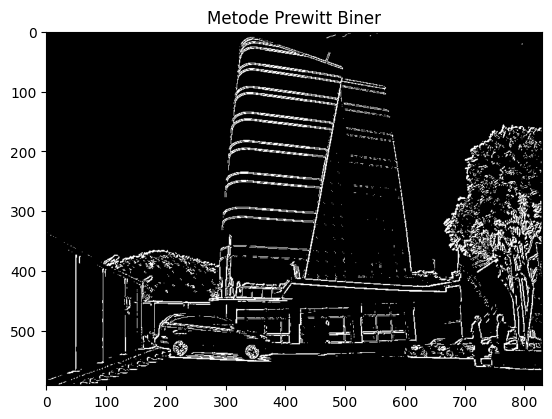

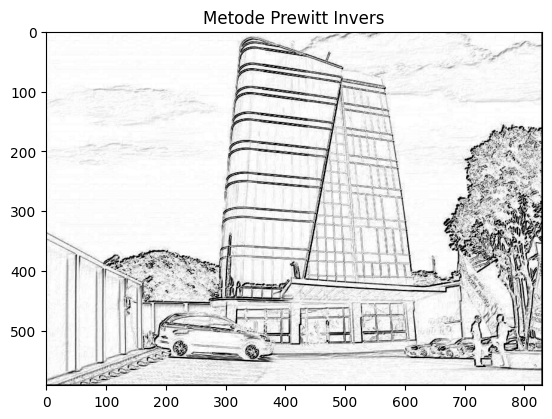

In [19]:
imgDTPrewittBiner = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)
imgDTPrewittInvers = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        x1 = int(imgGrayscale[y - 1][x - 1][0])
        x2 = int(imgGrayscale[y][x - 1][0])
        x3 = int(imgGrayscale[y + 1][x - 1][0])
        x4 = int(imgGrayscale[y - 1][x][0])
        x5 = int(imgGrayscale[y][x][0])
        x6 = int(imgGrayscale[y + 1][x][0])
        x7 = int(imgGrayscale[y - 1][x + 1][0])
        x8 = int(imgGrayscale[y][x + 1][0])
        x9 = int(imgGrayscale[y + 1][x + 1][0])
        xh = int(-x1 - x4 - x7 + x3 + x6 + x9)
        xv = int(-x1 - x2 - x3 + x7 + x8 + x9)
        xb = int(xh + xv)
        if xb < 0:
            xb = -xb
        if xb > 255:
            xb = 255
        if xb < 128:
            xbBiner = 0
        else:
            xbBiner = 255
        xbInverse = 255 - xb
        imgDTPrewittBiner[y][x] = (xbBiner, xbBiner, xbBiner)
        imgDTPrewittInvers[y][x] = (xbInverse, xbInverse, xbInverse)

plt.imshow(imgDTPrewittBiner)
plt.title("Metode Prewitt Biner")
plt.show()

plt.imshow(imgDTPrewittInvers)
plt.title("Metode Prewitt Invers")
plt.show()

------------------

## Metode Sobel

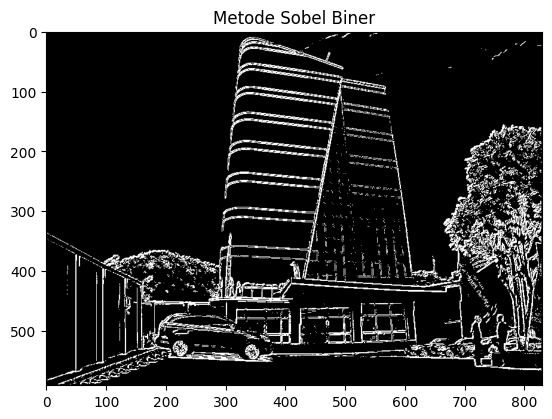

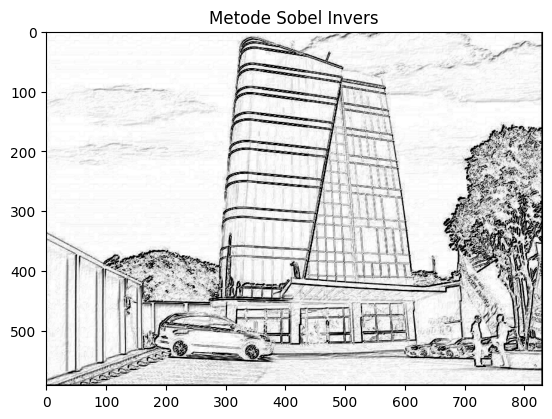

In [20]:
imgDTSobelBiner = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)
imgDTSobelInvers = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        x1 = int(imgGrayscale[y - 1][x - 1][0])
        x2 = int(imgGrayscale[y][x - 1][0])
        x3 = int(imgGrayscale[y + 1][x - 1][0])
        x4 = int(imgGrayscale[y - 1][x][0])
        x5 = int(imgGrayscale[y][x][0])
        x6 = int(imgGrayscale[y + 1][x][0])
        x7 = int(imgGrayscale[y - 1][x + 1][0])
        x8 = int(imgGrayscale[y][x + 1][0])
        x9 = int(imgGrayscale[y + 1][x + 1][0])
        xh = int(-x1 - (2 * x4) - x7 + x3 + (2 * x6) + x9)
        xv = int(-x1 - (2 * x2) - x3 + x7 + (2 * x8) + x9)
        xb = int(xh + xv)
        if xb < 0:
            xb = -xb
        if xb > 255:
            xb = 255
        if xb < 128:
            xbBiner = 0
        else:
            xbBiner = 255
        xbInverse = 255 - xb
        imgDTSobelBiner[y][x] = (xbBiner, xbBiner, xbBiner)
        imgDTSobelInvers[y][x] = (xbInverse, xbInverse, xbInverse)

plt.imshow(imgDTSobelBiner)
plt.title("Metode Sobel Biner")
plt.show()

plt.imshow(imgDTSobelInvers)
plt.title("Metode Sobel Invers")
plt.show()

------------------

## Metode Laplacian

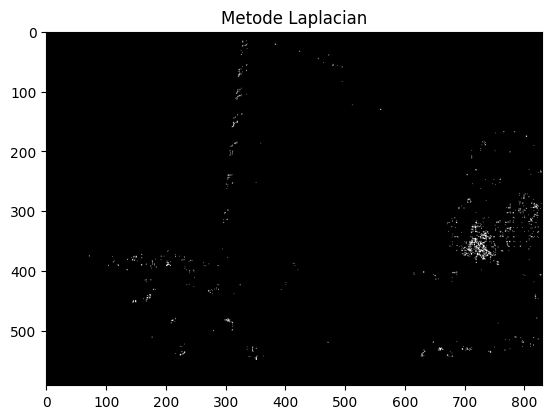

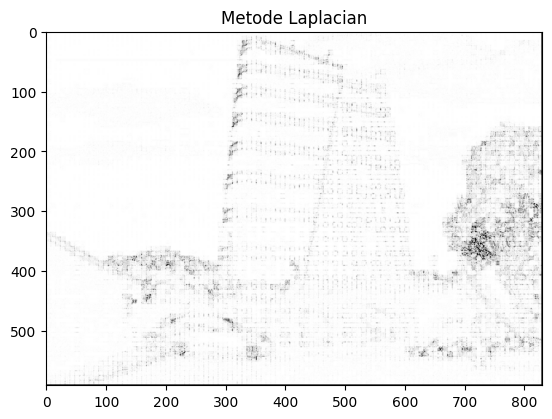

In [21]:
imgDTLaplacianBiner = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)
imgDTLaplacianInvers = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        x1 = int(imgGrayscale[y - 1][x - 1][0])
        x2 = int(imgGrayscale[y][x - 1][0])
        x3 = int(imgGrayscale[y + 1][x - 1][0])
        x4 = int(imgGrayscale[y - 1][x][0])
        x5 = int(imgGrayscale[y][x][0])
        x6 = int(imgGrayscale[y + 1][x][0])
        x7 = int(imgGrayscale[y - 1][x + 1][0])
        x8 = int(imgGrayscale[y][x + 1][0])
        x9 = int(imgGrayscale[y + 1][x + 1][0])
        xb = int(x1 - (2 * x2) + x3 - (2 * x4) + (4 * x5) - (2 * x6) + x7 - (2 * x8) + x9)
        if xb < 0:
            xb = -xb
        if xb > 255:
            xb = 255
        if xb < 128:
            xbBiner = 0
        else:
            xbBiner = 255
        xbInverse = 255 - xb
        imgDTLaplacianBiner[y][x] = (xbBiner, xbBiner, xbBiner)
        imgDTLaplacianInvers[y][x] = (xbInverse, xbInverse, xbInverse)

plt.imshow(imgDTLaplacianBiner)
plt.title("Metode Laplacian Biner")
plt.show()

plt.imshow(imgDTLaplacianInvers)
plt.title("Metode Laplacian Invers")
plt.show()

------------------